In [89]:
import seaborn as sns
import pandas as pd
import re
import matplotlib as mpl
from matplotlib import rc
import missingno as msno
import warnings
import datetime
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# matplotlib 한글 사용을 위한 코드
rc('font', family='AppleGothic')

In [3]:
# X_train = pd.read_csv('X_train_08_1.csv').drop(columns='Unnamed: 0')
# y_train = pd.read_csv('y_train_08_1.csv').drop(columns='Unnamed: 0')
# X_test = pd.read_csv('X_test_08_1.csv').drop(columns='Unnamed: 0')
# y_test = pd.read_csv('y_test_08_1.csv').drop(columns='Unnamed: 0')

In [4]:
X_train = pd.read_csv('X_train_09.csv').drop(columns='Unnamed: 0')
y_train = pd.read_csv('y_train_09.csv').drop(columns='Unnamed: 0')
X_test = pd.read_csv('X_test_09.csv').drop(columns='Unnamed: 0')
y_test = pd.read_csv('y_test_09.csv').drop(columns='Unnamed: 0')

In [5]:
total_df = pd.concat([X_train, y_train], axis=1)
total_df.columns

Index(['title', 'director', 'distributor', 'distributor_group', 'release_date',
       'release_season', 'nation', 'screen', 'genre', 'rate', 'expert_rating',
       'starring_actors', 'running_times', 'audience_rating',
       'rating_audiences', 'director_power', 'sequel', 'original',
       'actor_power', 'before_news', 'after_news', 'aud_nationwide',
       'log_aud'],
      dtype='object')

In [6]:
total_df.head(1)

,title,director,distributor,distributor_group,release_date,release_season,nation,screen,genre,rate,...,audience_rating,rating_audiences,director_power,sequel,original,actor_power,before_news,after_news,aud_nationwide,log_aud
0,인사이드 아웃,피트 닥터,월트디즈니컴퍼니코리아(주),B,7/9/2015,summer,미국,777,애니메이션,전체관람가,...,9.113006,938,4968687.0,0,0,14906061,15150.0,384.0,4968687,15.418666


In [7]:
# X_train = total_df.drop(columns=['rev_nationwide', 'rev_seoul', 'rev_seoul.1', 'type', 'release', 'form', 'realease_year', 'director_movie_num', 'aud_nationwide'])
# y_train = total_df['aud_nationwide']



In [8]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# len(X_train), len(y_train), len(X_test), len(y_test)

In [415]:
df.columns

Index(['title', 'director', 'distributor', 'distributor_group', 'release_date',
       'release_season', 'nation', 'screen', 'genre', 'rate', 'expert_rating',
       'starring_actors', 'running_times', 'audience_rating',
       'rating_audiences', 'director_power', 'sequel', 'original',
       'actor_power', 'before_news', 'after_news', 'aud_nationwide', 'log_aud',
       'dist_cat'],
      dtype='object')

In [9]:
len(X_train.columns)

21

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              740 non-null    object 
 1   director           740 non-null    object 
 2   distributor        740 non-null    object 
 3   distributor_group  740 non-null    object 
 4   release_date       740 non-null    object 
 5   release_season     740 non-null    object 
 6   nation             740 non-null    object 
 7   screen             740 non-null    int64  
 8   genre              740 non-null    object 
 9   rate               740 non-null    object 
 10  expert_rating      740 non-null    float64
 11  starring_actors    740 non-null    object 
 12  running_times      740 non-null    int64  
 13  audience_rating    740 non-null    float64
 14  rating_audiences   740 non-null    int64  
 15  director_power     740 non-null    float64
 16  sequel             740 non

In [11]:
df = pd.concat([X_train, y_train], axis=1)

In [12]:
df = df.reset_index().drop(columns='index')

In [248]:
# import statsmodels.api as sm

# model = sm.OLS.from_formula("aud_nationwide ~ distributor_group + release_season + nation + genre + rate + C(sequel) + C(original) + screen + expert_rating + audience_rating + running_times + rating_audiences + director_power + actor_power", data=df)
# result = model.fit()



In [247]:
# print(result.summary())

In [251]:
group_a = ['씨제이이앤엠(주)', '메가박스중앙(주)플러스엠', 'CGV아트하우스', '롯데쇼핑㈜롯데엔터테인먼트',
'CGV아트하우스,(주)대명문화공장', '롯데쇼핑㈜롯데엔터테인먼트,(주)마인스 엔터테인먼트',
'CGV아트하우스,(주)리틀빅픽쳐스', 'CGV아트하우스,영화사 풀', '메가박스중앙(주)플러스엠,(주)키위미디어그룹',
'롯데쇼핑㈜롯데엔터테인먼트,(주)리틀빅픽쳐스', '메가박스중앙(주)플러스엠,주식회사 키위컴퍼니',
'씨제이 씨지브이(CJ CGV)(주)', '롯데컬처웍스(주)롯데엔터테인먼트',
'롯데컬처웍스(주)롯데엔터테인먼트,씨네그루(주)키다리이엔티', '메가박스중앙(주)플러스엠,(주)콘텐츠 난다긴다',
'씨제이이앤엠(주),(주)덱스터스튜디오', '(주)쇼박스', '(주)넥스트엔터테인먼트월드(NEW)', '(주)쇼박스,(주)와우픽쳐스',
'(주)넥스트엔터테인먼트월드(NEW),(주)팬엔터테인먼트']
group_b = ['월트디즈니컴퍼니코리아(주)', '이십세기폭스코리아(주)', '유니버설픽쳐스인터내셔널 코리아(유)',
'워너브러더스 코리아(주)', '씨네그루(주)다우기술', '(주)이수C&E', '(주)티캐스트',
'씨네그루(주)키다리이엔티', '월트디즈니컴퍼니코리아 유한책임회사', '소니픽쳐스엔터테인먼트코리아주식회사극장배급지점',
'(주)이수C&E,(주)스톰픽쳐스코리아', '씨네그루(주)키다리이엔티,주식회사 키위컴퍼니',
'(주)이수C&E,(주)에이원엔터테인먼트', '씨네그루(주)키다리이엔티,(주)삼백상회',
'(주)이수C&E,(주)시너지미디어', '(주)셀트리온엔터테인먼트', '케이티하이텔(주)']



In [255]:
df['dist_cat'] = df['distributor']

for a in group_a:
    df['dist_cat'] = df['dist_cat'].replace(a, 'A')
    
for b in group_b:
    df['dist_cat'] = df['dist_cat'].replace(b, 'B')

df['dist_cat'] = df['dist_cat'].apply(lambda data : "C" if data != 'A' and data != 'B' else data)

In [256]:
X_test['dist_cat'] = X_test['distributor']

for a in group_a:
    X_test['dist_cat'] = X_test['dist_cat'].replace(a, 'A')
    
for b in group_b:
    X_test['dist_cat'] = X_test['dist_cat'].replace(b, 'B')

X_test['dist_cat'] = X_test['dist_cat'].apply(lambda data : "C" if data != 'A' and data != 'B' else data)

In [ ]:
# sns.countplot(x='dist_cat', data=df);

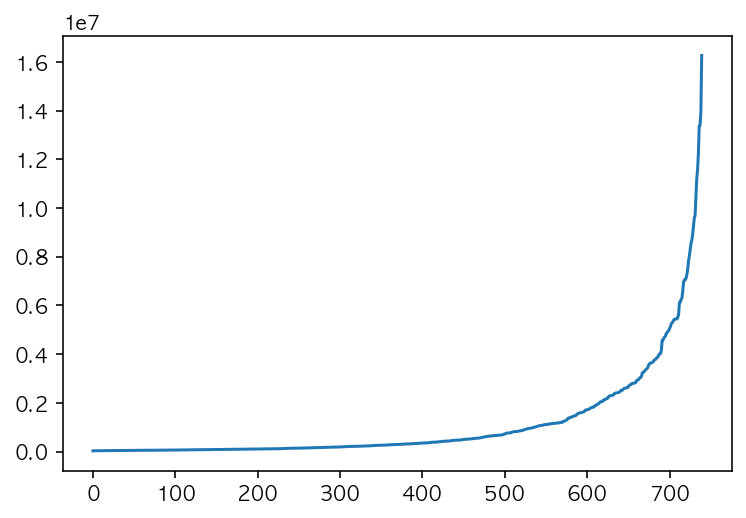

In [272]:
plt.plot(y_train['aud_nationwide'].sort_values().reset_index(drop = True))
plt.show()

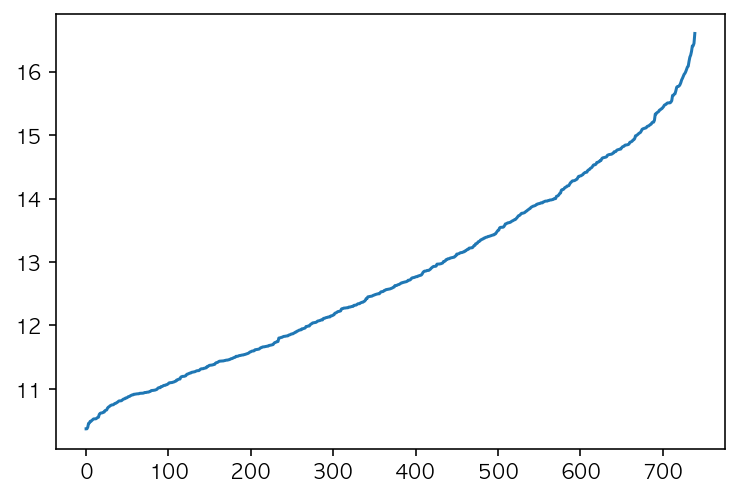

In [273]:
plt.plot(np.log(y_train['aud_nationwide'].sort_values().reset_index(drop = True)))
plt.show()

# model0
- 영화개봉 전, 후 뉴스기사 컬럼 사용
- 영화 개봉 전 : before_news
- 영화 개봉 후 : after_news
- 총 15개 독립변수 사용
- sequel컬럼 제거
- 종속변수에 Log 씌움
- distributor_group 대신에 dist_cat 사용


In [275]:
df0 = df.copy()

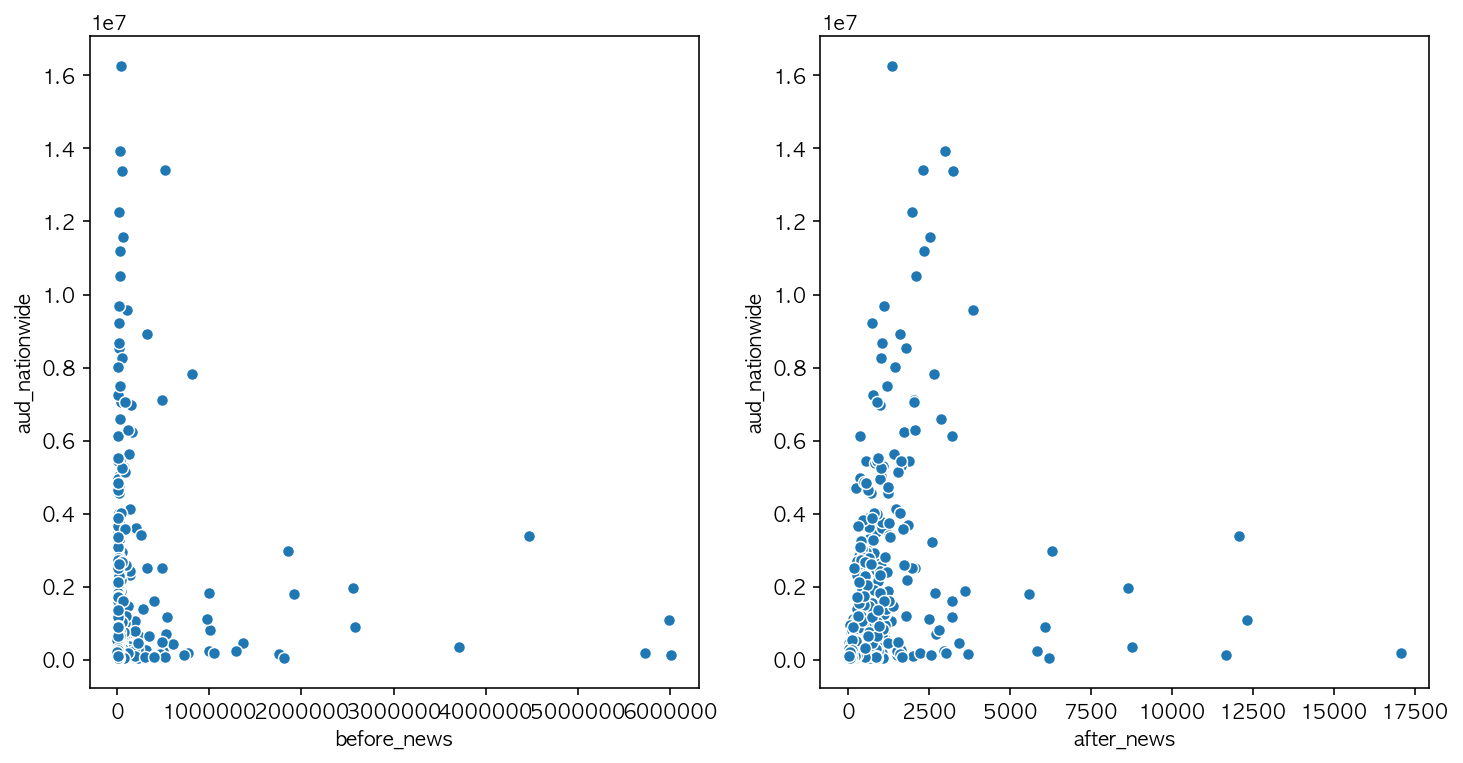

In [276]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.scatterplot(x="before_news", y="aud_nationwide", data=df0)
plt.subplot(122)
sns.scatterplot(x="after_news", y="aud_nationwide", data=df0)
plt.show()

In [277]:
# df0_1 = df0.reset_index()

In [278]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 6))

# index = list(df0_1['index'])
# x_cords = list(df0_1['before_news'])
# y_cords = list(df0_1['aud_nationwide'])

# for i, index in enumerate(index):
#     x = x_cords[i]
#     y = y_cords[i]
#     plt.scatter(x, y, marker='o', color='blue')
#     plt.text(x + 0.4, y + 0.4, str(index), fontsize=9)
# plt.show()

In [279]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 6))

# index = list(df0_1['index'])
# x_cords = list(df0_1['after_news'])
# y_cords = list(df0_1['aud_nationwide'])

# for i, index in enumerate(index):
#     x = x_cords[i]
#     y = y_cords[i]
#     plt.scatter(x, y, marker='o', color='blue')
#     plt.text(x + 0.4, y + 0.4, str(index), fontsize=9)
# plt.show()

In [165]:
# 뉴스 기사수에 로그를 취해본다 

df0_1['log_before_news'] = df0_1['before_news'].apply(lambda news: np.log(news))
df0_1['log_after_news'] = df0_1['after_news'].apply(lambda news: np.log(news))

In [171]:
# 로그 취한값에 다시 루트 씌우기

df0_1['log_sqrt_before_news'] = df0_1['log_before_news'].apply(lambda news: np.sqrt(news))
df0_1['log_sqrt_after_news'] = df0_1['log_after_news'].apply(lambda news: np.sqrt(news))

In [173]:
df0_1['sqrt_before_news'] = df0_1['before_news'].apply(lambda news: np.sqrt(news))
df0_1['sqrt_after_news'] = df0_1['after_news'].apply(lambda news: np.sqrt(news))

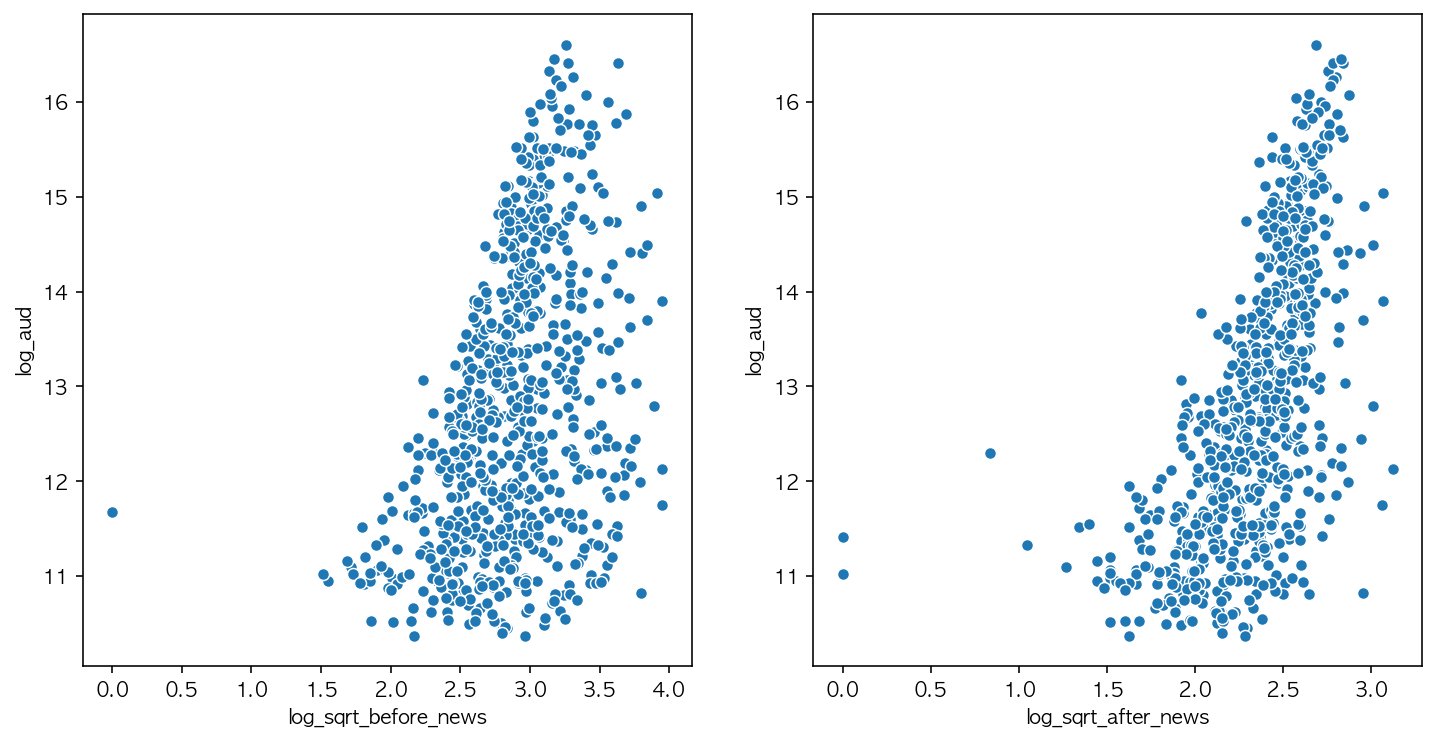

In [217]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.scatterplot(x="log_sqrt_before_news", y="log_aud", data=df0_1)
plt.subplot(122)
sns.scatterplot(x="log_sqrt_after_news", y="log_aud", data=df0_1)
plt.show()

In [150]:
# sns.barplot(x='distributor_group',y='aud_nationwide', data=df0)

In [144]:
# list(df0_1[df0_1['distributor_group'] == 'C']['distributor'])

In [ ]:
# df0_1.iloc[309]

In [280]:
df0['after_news_0to1'] = df0['after_news'].apply(lambda num : num if num > 0 else 1.0)

In [281]:
# df에서 title을 제외하고 15개의 독립변수 사용

feature_names = ['screen', 'expert_rating', 'audience_rating', 'running_times', 'rating_audiences', 'director_power', 'actor_power', 'np.sqrt(np.log(before_news))', 'np.sqrt(np.log(after_news_0to1))']
feature_names = ["scale({})".format(name) for name in feature_names] + ['dist_cat', 'release_season', 'nation', 'genre', 'rate', 'C(original)']
model0 = sm.OLS.from_formula("log_aud ~" + "+".join(feature_names), data=df0)
result0 = model0.fit()
print(result0.summary())


                            OLS Regression Results                            
Dep. Variable:                log_aud   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     73.00
Date:                Thu, 02 Apr 2020   Prob (F-statistic):          4.82e-211
Time:                        13:56:49   Log-Likelihood:                -771.95
No. Observations:                 740   AIC:                             1618.
Df Residuals:                     703   BIC:                             1788.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [285]:
# kfold

from sklearn.model_selection import KFold

scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df0)):
    df_train = df0.iloc[idx_train]
    df_test = df0.iloc[idx_test]
    
    model = sm.OLS.from_formula("log_aud ~" + "+".join(feature_names), data=df_train)
    result = model.fit()
    
    pred =  result.predict(df_test[['screen', 'expert_rating', 'audience_rating', 'running_times', 'rating_audiences', 'director_power', 'actor_power', 'before_news', 'after_news_0to1', 'dist_cat', 'release_season', 'nation', 'genre', 'rate', 'original']])
    rss = ((df_test['log_aud'] - pred) ** 2).sum()
    tss = ((df_test['log_aud'] - df_test['log_aud'].mean()) ** 2).sum()
    rsquared = 1 - rss/tss

    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))


학습 R2 = 0.78582630, 검증 R2 = 0.80579099
학습 R2 = 0.78973877, 검증 R2 = 0.75734983
학습 R2 = 0.79259080, 검증 R2 = 0.64188631
학습 R2 = 0.79258003, 검증 R2 = 0.74553873
학습 R2 = 0.79012961, 검증 R2 = 0.76056787
학습 R2 = 0.79248039, 검증 R2 = 0.73902611
학습 R2 = 0.79219743, 검증 R2 = 0.73026424
학습 R2 = 0.79136377, 검증 R2 = 0.75106892
학습 R2 = 0.78762837, 검증 R2 = 0.78653347
학습 R2 = 0.79309666, 검증 R2 = 0.73561815


In [300]:
X_test['after_news_0to1'] = X_test['after_news'].apply(lambda num : num if num > 0 else 1.0)

In [301]:
# model0의 테스트 R
 
pred =  result0.predict(X_test[['screen', 'expert_rating', 'audience_rating', 'running_times', 'rating_audiences', 'director_power', 'actor_power', 'before_news', 'after_news_0to1', 'dist_cat', 'release_season', 'nation', 'genre', 'rate', 'original']])
rss = ((y_test['log_aud'] - pred) ** 2).sum()
tss = ((y_test['log_aud'] - y_test['log_aud'].mean()) ** 2).sum()
rsquared = 1 - rss/tss
rsquared

0.7624339305479657

In [286]:
# fig = plt.figure(figsize=(12, 80))
# sm.graphics.plot_partregress_grid(result0, fig=fig)
# fig.suptitle("")
# plt.show()

In [288]:
# print(result0.t_test("dist_cat[T.B] = dist_cat[T.C]"))

# model1 
- running_times 컬럼 조정

In [407]:
df1 = df0.copy()

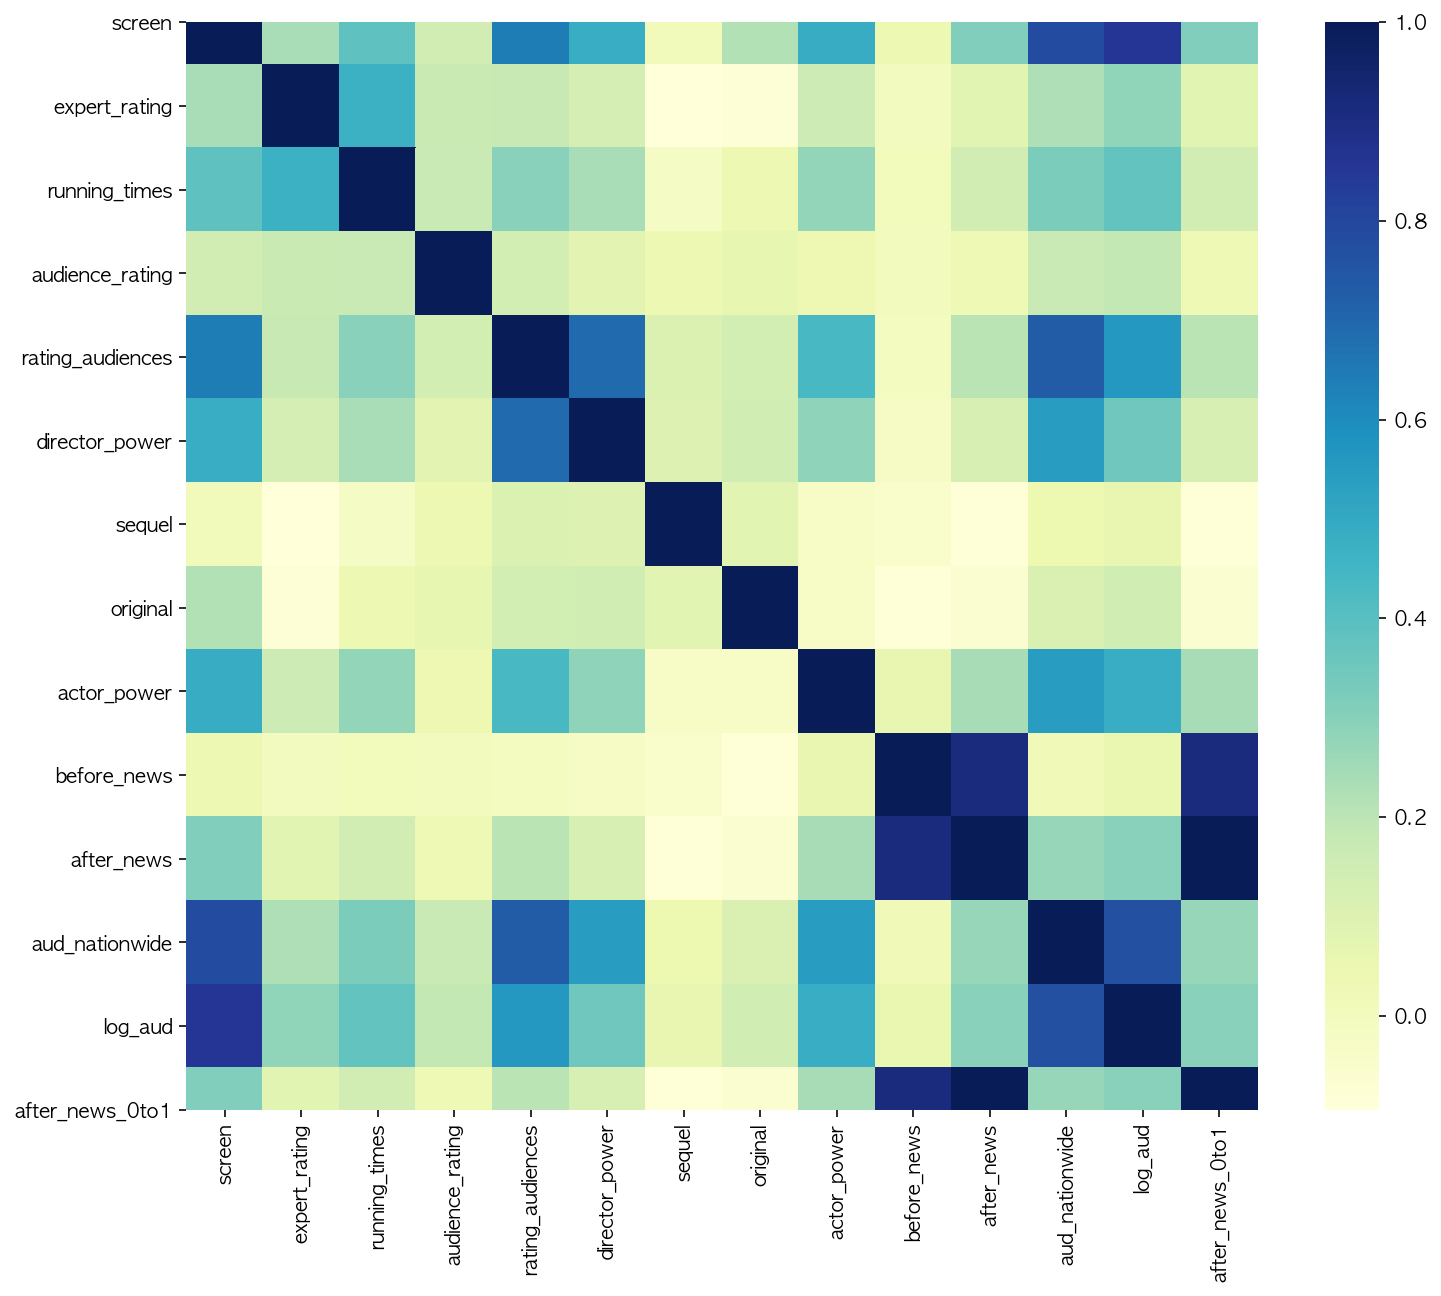

In [405]:
plt.figure(figsize=(12, 10))
sns.heatmap(df1.corr(), cmap="YlGnBu")
plt.show()

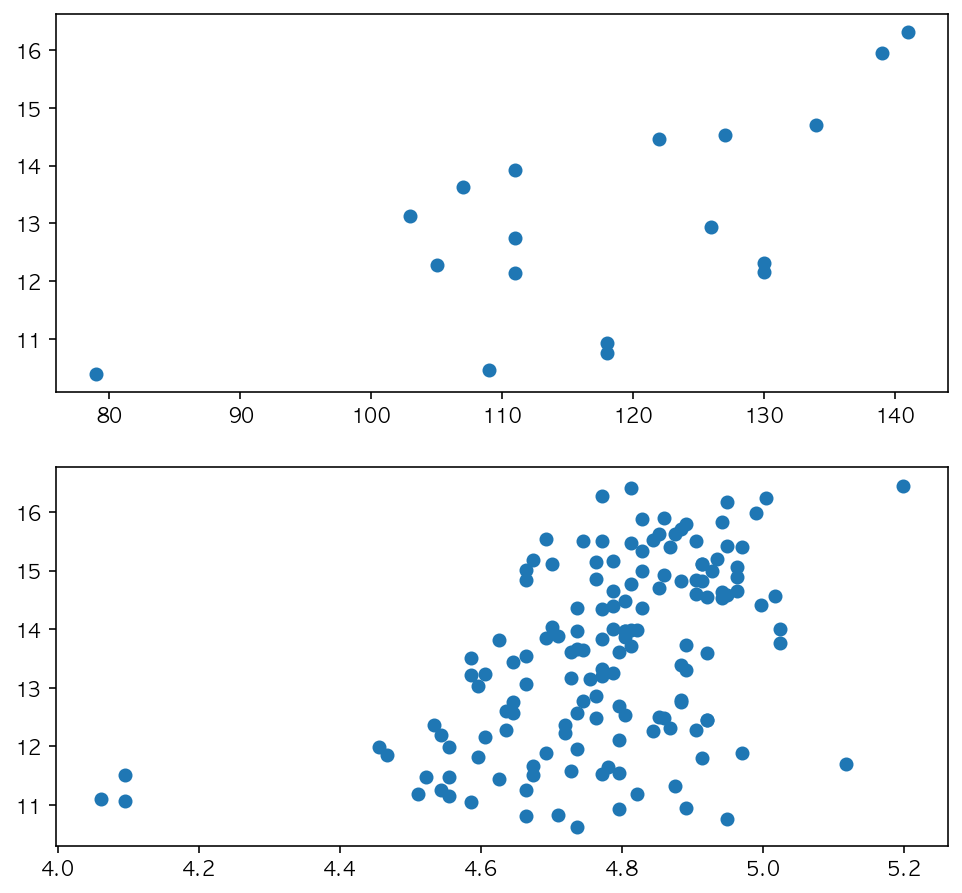

In [456]:
# 장르별 러닝타임과 그 관객수

plt.figure(figsize=(8, 16))
plt.subplot(411)
plt.scatter(df1[df1["genre"] == "판타지"]["running_times"], df1[df1["genre"] == "판타지"]["log_aud"])
plt.subplot(412)
plt.scatter(np.log(df1[df1["genre"] == "액션"]["running_times"]), df1[df1["genre"] == "액션"]["log_aud"])

plt.show()

In [430]:
# df1_1 = df1[df1["genre"] == "범죄"]
# df1_1 = df1_1.reset_index()
# df1_1 = df1_1.drop(columns='index')
# df1_1 = df1_1.reset_index()

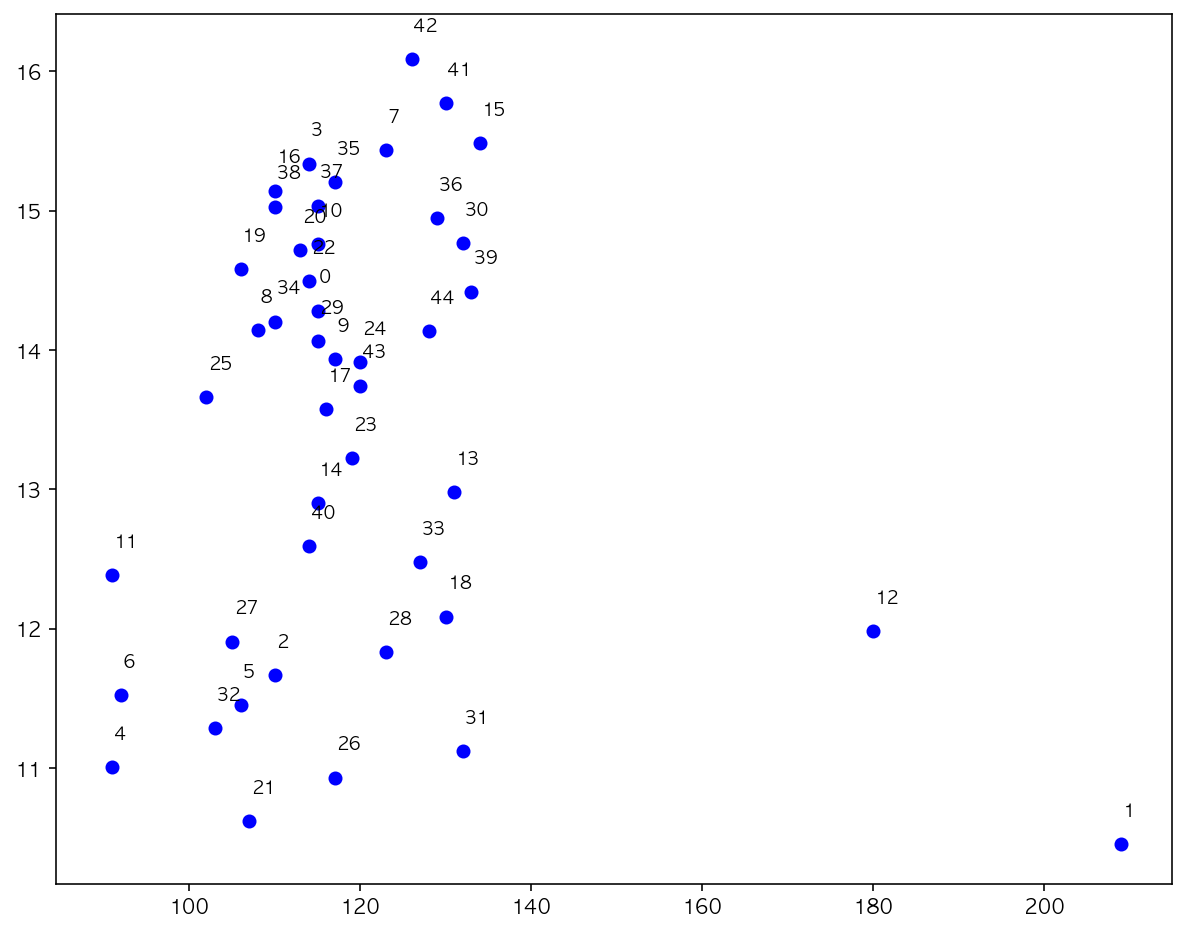

In [434]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 8))

# index = list(df1_1['index'])
# x_cords = list(df1_1["running_times"])
# y_cords = list(df1_1["log_aud"])

# for i, index in enumerate(index):
#     x = x_cords[i]
#     y = y_cords[i]
#     plt.scatter(x, y, marker='o', color='blue')
#     plt.text(x + 0.2, y + 0.2, str(index), fontsize=9)
# plt.show()

In [440]:
# df1_1.iloc[12]

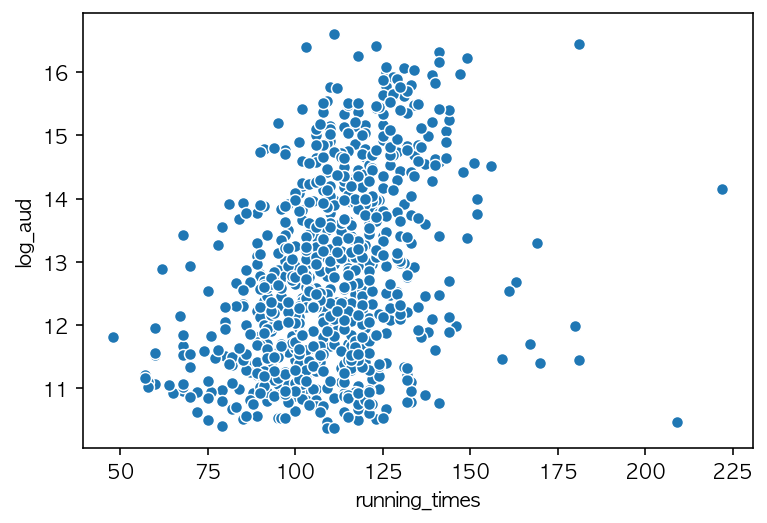

In [344]:
# running_times 칼럼

sns.scatterplot(x=df1['running_times'], y=df1['log_aud'], data=df1);

In [441]:
# screen 칼럼

# sns.scatterplot(x=df1['screen'], y=df1['log_aud'], data=df1);

In [442]:
# 총 15개의 독립변수 사용

feature_names = ['screen', 'expert_rating', 'audience_rating', 'running_times', 'rating_audiences', 'director_power', 'actor_power', 'np.sqrt(np.log(before_news))', 'np.sqrt(np.log(after_news_0to1))']
feature_names = ["scale({})".format(name) for name in feature_names] + ['dist_cat', 'release_season', 'nation', 'genre', 'rate', 'C(original)']
model1 = sm.OLS.from_formula("log_aud ~" + "+".join(feature_names), data=df1)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                log_aud   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     73.00
Date:                Thu, 02 Apr 2020   Prob (F-statistic):          4.82e-211
Time:                        15:46:42   Log-Likelihood:                -771.95
No. Observations:                 740   AIC:                             1618.
Df Residuals:                     703   BIC:                             1788.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [409]:
# kfold

from sklearn.model_selection import KFold

scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df1)):
    df_train = df1.iloc[idx_train]
    df_test = df1.iloc[idx_test]
    
    model = sm.OLS.from_formula("log_aud ~" + "+".join(feature_names), data=df_train)
    result = model.fit()
    
    pred =  result.predict(df_test[['screen', 'expert_rating', 'audience_rating', 'running_times', 'rating_audiences', 'director_power', 'actor_power', 'before_news', 'after_news_0to1', 'dist_cat', 'release_season', 'nation', 'genre', 'rate', 'original']])
    rss = ((df_test['log_aud'] - pred) ** 2).sum()
    tss = ((df_test['log_aud'] - df_test['log_aud'].mean()) ** 2).sum()
    rsquared = 1 - rss/tss

    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

학습 R2 = 0.78582630, 검증 R2 = 0.80579099
학습 R2 = 0.78973877, 검증 R2 = 0.75734983
학습 R2 = 0.79259080, 검증 R2 = 0.64188631
학습 R2 = 0.79258003, 검증 R2 = 0.74553873
학습 R2 = 0.79012961, 검증 R2 = 0.76056787
학습 R2 = 0.79248039, 검증 R2 = 0.73902611
학습 R2 = 0.79219743, 검증 R2 = 0.73026424
학습 R2 = 0.79136377, 검증 R2 = 0.75106892
학습 R2 = 0.78762837, 검증 R2 = 0.78653347
학습 R2 = 0.79309666, 검증 R2 = 0.73561815


In [410]:
# X_test['running_times_cat'] = X_test['running_times'].apply(R_func)
# X_test.drop(columns='running_times_cat', inplace=True)

In [411]:
# model1의 테스트 R
 
pred =  result1.predict(X_test[['screen', 'expert_rating', 'audience_rating', 'running_times', 'rating_audiences', 'director_power', 'actor_power', 'before_news', 'after_news_0to1', 'dist_cat', 'release_season', 'nation', 'genre', 'rate', 'original']])
rss = ((y_test['log_aud'] - pred) ** 2).sum()
tss = ((y_test['log_aud'] - y_test['log_aud'].mean()) ** 2).sum()
rsquared = 1 - rss/tss
rsquared

0.7624339305479657

# model2
- expert_rating 조절

In [406]:
df2 = df1.copy()

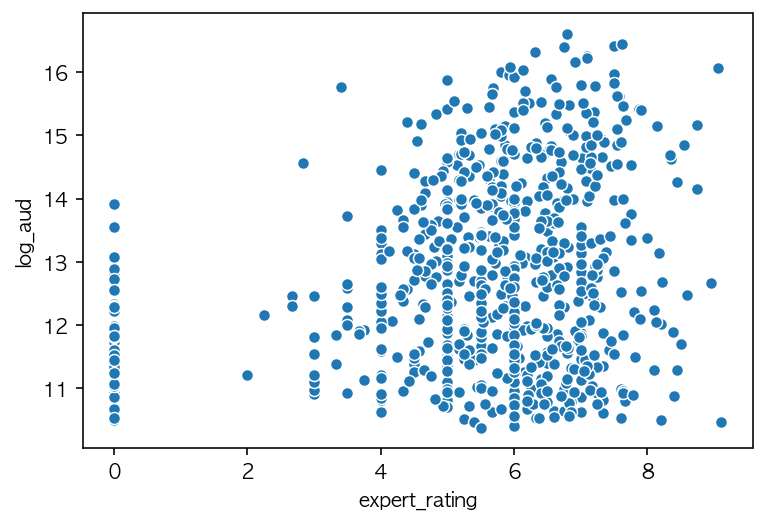

In [412]:
sns.scatterplot(x=df1['expert_rating'], y=df1['log_aud'], data=df2);

### 모형의 진단과수정

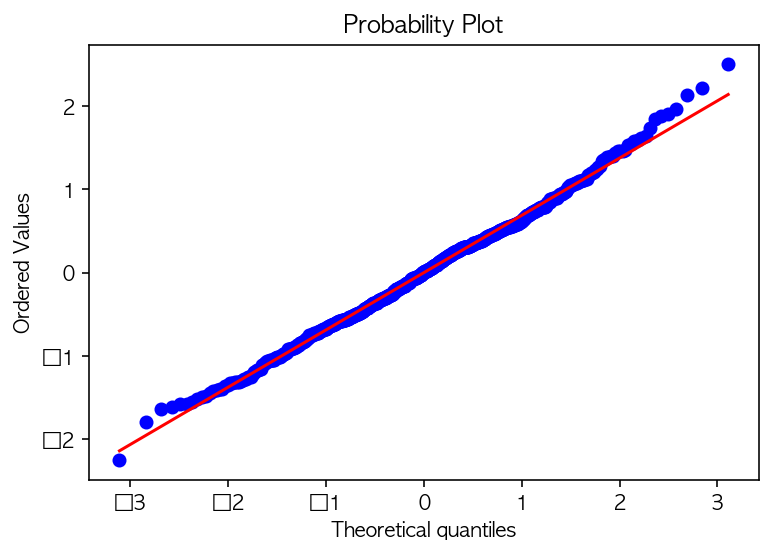

In [246]:
## 잔차 정규성 확인

sp.stats.probplot(result0.resid, plot=plt)
plt.show()